In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Fetch Glass Identification dataset (UCI ID = 42)
glass = fetch_ucirepo(id=42)

# Features and target
X = glass.data.features
y = glass.data.targets

# Combine into one DataFrame
df = pd.concat([X, y], axis=1)

print("Glass Identification dataset loaded successfully.")
print(df.head())


Glass Identification dataset loaded successfully.
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type_of_glass
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0              1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0              1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0              1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0              1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0              1


In [3]:
print("--- Advanced Statistical Summary ---")

# 1. Broad Statistics (Required: describe, mean, median, std)
stats_summary = df.describe().T
stats_summary['median'] = df.median(numeric_only=True)
stats_summary['variance'] = df.var(numeric_only=True)

print("Key statistics for the first 10 features:")
display(stats_summary[['mean', 'median', 'std', 'variance']].head(10))

# 2. Grouped Statistics (Required: groupby)
# This shows how feature averages differ between Spam (1) and Not Spam (0)
print("\nMean Feature Values Grouped by Glass Type (Top 5 features):")

grouped_stats = df.groupby('Type_of_glass').mean(numeric_only=True)
display(grouped_stats.iloc[:, :5])


--- Advanced Statistical Summary ---
Key statistics for the first 10 features:


,mean,median,std,variance
RI,1.518365,1.51768,0.003037,0.000009
Na,13.407850,13.30000,0.816604,0.666841
Mg,2.684533,3.48000,1.442408,2.080540
Al,1.444907,1.36000,0.499270,0.249270
Si,72.650935,72.79000,0.774546,0.599921
K,0.497056,0.55500,0.652192,0.425354
Ca,8.956963,8.60000,1.423153,2.025366
Ba,0.175047,0.00000,0.497219,0.247227
Fe,0.057009,0.00000,0.097439,0.009494
Type_of_glass,2.780374,2.00000,2.103739,4.425716



Mean Feature Values Grouped by Glass Type (Top 5 features):


,RI,Na,Mg,Al,Si
Type_of_glass,,,,,
1,1.518718,13.242286,3.552429,1.163857,72.619143
2,1.518619,13.111711,3.002105,1.408158,72.598026
3,1.517964,13.437059,3.543529,1.201176,72.404706
5,1.518928,12.827692,0.773846,2.033846,72.366154
6,1.517456,14.646667,1.305556,1.366667,73.206667
7,1.517116,14.442069,0.538276,2.122759,72.965862


--- Correlation Analysis ---


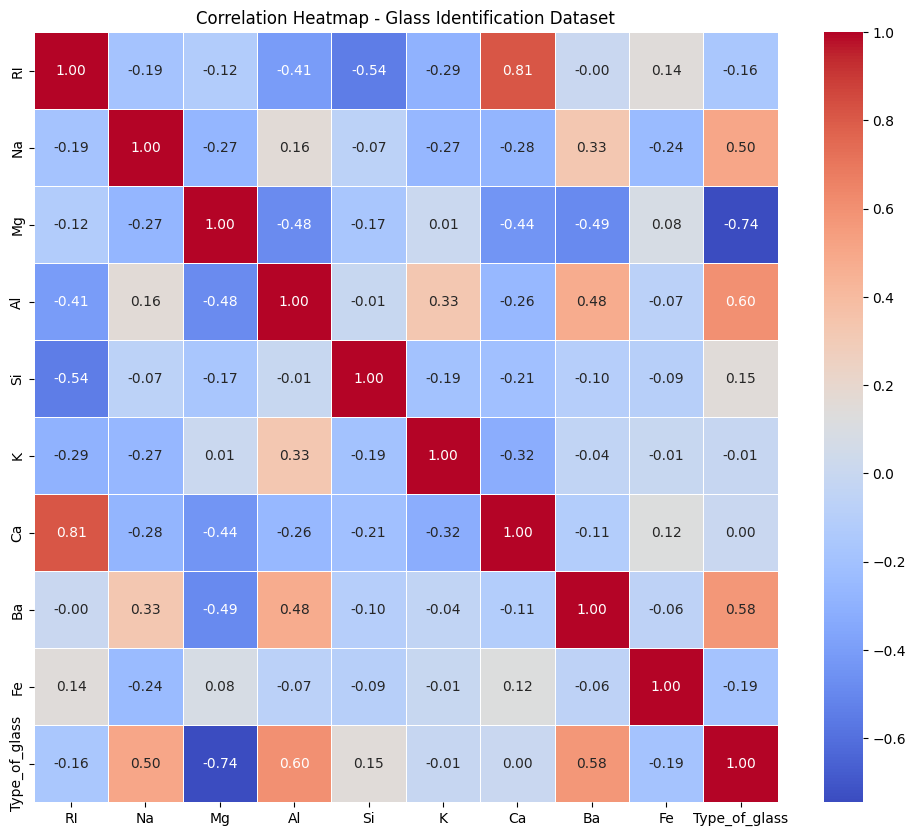


Features with highest correlation to Glass Type:
Type_of_glass    1.000000
Al               0.598829
Ba               0.575161
Na               0.502898
Si               0.151565
Ca               0.000952
Name: Type_of_glass, dtype: float64


In [4]:
print("--- Correlation Analysis ---")

# 1. Calculate Correlation Matrix (Required: corr)
corr_matrix = df.corr(numeric_only=True)

# 2. Plotting the Heatmap (Required: plot)
plt.figure(figsize=(12, 10))

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title('Correlation Heatmap - Glass Identification Dataset')
plt.show()

# 3. Finding High Correlation with Target
target_corr = corr_matrix['Type_of_glass'].sort_values(ascending=False)

print("\nFeatures with highest correlation to Glass Type:")
print(target_corr.head(6))  # Top 5 + target itself


--- Distribution Analysis via Violin Plots ---


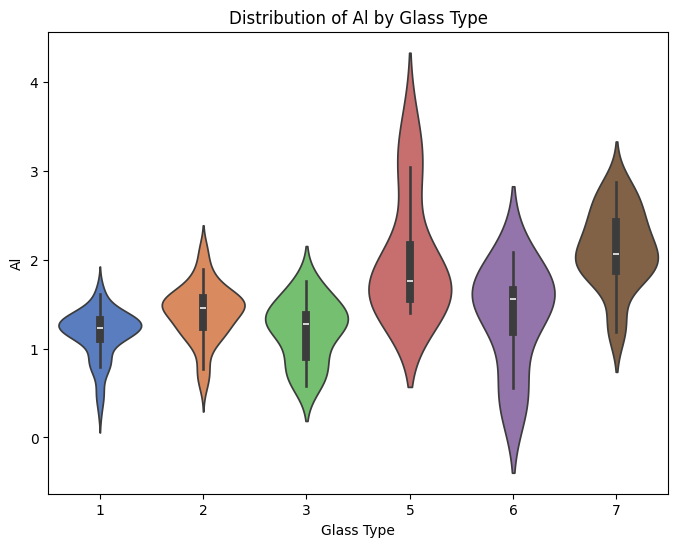

In [7]:
print("--- Distribution Analysis via Violin Plots ---")

# Get the most correlated feature (excluding target itself)
top_feature = target_corr.index[1]

plt.figure(figsize=(8, 6))

sns.violinplot(
    x='Type_of_glass',
    y=top_feature,
    data=df,
    hue='Type_of_glass',
    palette='muted',
    legend=False
)

plt.title(f'Distribution of {top_feature} by Glass Type')
plt.xlabel('Glass Type')
plt.ylabel(top_feature)

plt.show()


# Conclusion

In this lab, we successfully conducted a statistical and correlation analysis on the Glass Identification dataset. 

The correlation matrix revealed relationships between various chemical components such as Sodium (Na), Calcium (Ca), Magnesium (Mg), and Refractive Index (RI). Certain features showed stronger relationships with the glass type, indicating that chemical composition plays a significant role in glass classification.

Through grouped statistical analysis, we observed noticeable differences in feature means across different glass categories. These variations highlight how specific elemental concentrations influence the classification of glass types.

Overall, the statistical insights gained from this analysis will help in effective feature selection and improve the performance of upcoming machine learning models for multiclass glass classification.
